In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import integrate
plt.style.use("science")

# Question 1

The integral given to us is
$$ \int_0^1 \frac{x^3}{e^x-1} $$
The function for change of variables is given as 
$$\frac{1}{b+(x-a)^2}$$
The normalization comes out to be 
$$N = \frac{\arctan\left(\frac{a}{\sqrt{b}}\right) - \arctan\left(\frac{a - 1}{\sqrt{b}}\right)}{\sqrt{b}}$$

The definite integral comes out to be
$$N*y(x) = \frac{\arctan\left(\frac{x - a}{\sqrt{b}}\right) + \arctan\left(\frac{a}{\sqrt{b}}\right)}{\sqrt{b}}$$

Upon inverting we get
$$x = a + \sqrt(b)*\tan\left(\sqrt{b}Ny - \arctan(\frac{a}{\sqrt{b}})\right)$$

In [2]:
# these are some default values
a = 1
b = 1

# Normalization constant
N = 1/np.sqrt(b)*(np.atan(a/np.sqrt(b))-np.atan((a-1)/np.sqrt(b)))


def f(x):
    y = x**3/(np.exp(x)-1)
    return y
def w(x,a=a, b=b):
    y = 1/(N*(b+(x-a)**2))
    return y
def x(y,a=a,b=b,N=N):
    x = a + np.sqrt(b) * np.tan(np.sqrt(b) * N * y - np.atan(a/np.sqrt(b)))
    return x,a,b,N
def g(x,a=a,b=b,N=N):
    y = ((N * (b + (x - a)**2)) * (x**3))/(np.exp(x)-1)
    return y
def MC_f(n):
    v = 0.0
    for i in range(n):
        v += f(np.random.rand())
    return v/n
def MC_g(n,a,b,N):
    v = 0.0
    for i in range(n):
        v += g(*x(np.random.rand(),a,b,N))
    return v/n


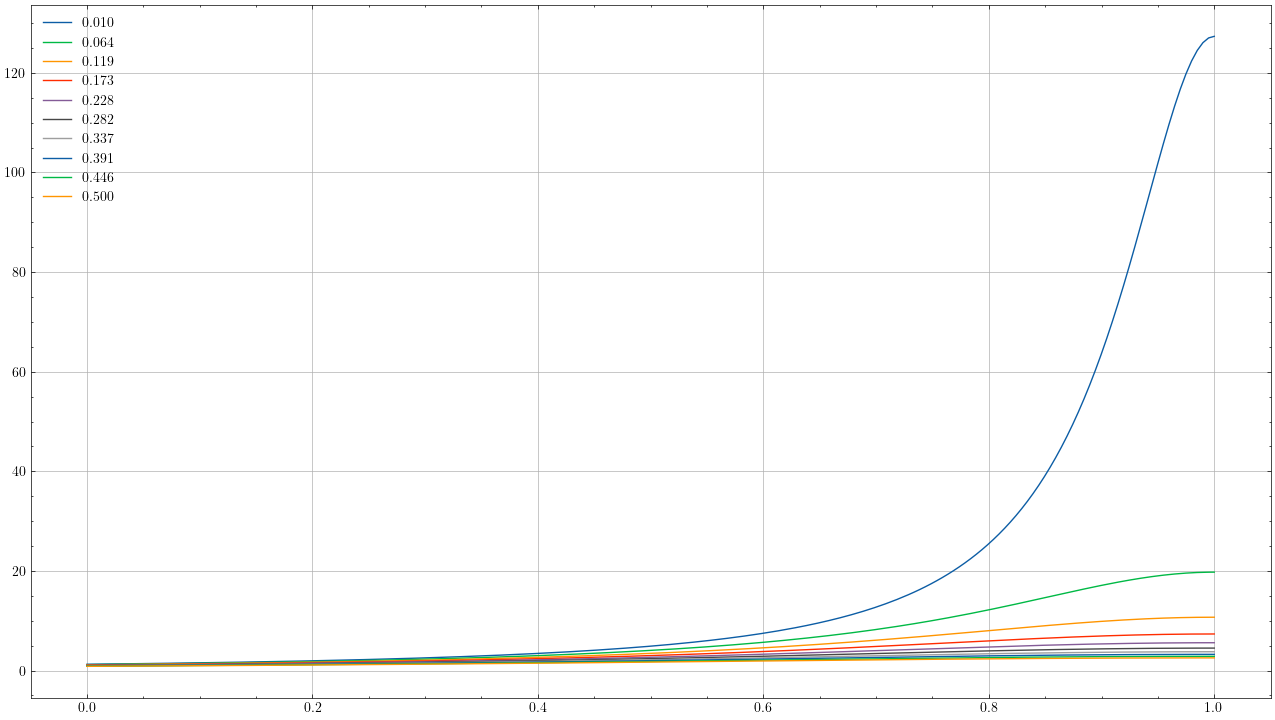

In [3]:
plt.figure(figsize=(16,9))
bval = np.linspace(0.01,0.5,10)
xs = np.linspace(0.0001, 1.0, 200)

for i in bval:
    ys = w(xs,b=i)
    plt.plot(xs, ys, label=f'{i:.3f}')
plt.grid()
plt.legend()

In [4]:
# the choice of a and b done so that f(x)/w(x) is kind of a flat function
# choosing smaller values introduces a peak at the middle
a = 1
b = .08

# Normalization constant
N = 1/np.sqrt(b)*(np.atan(a/np.sqrt(b))-np.atan((a-1)/np.sqrt(b)))
# Integrated value by numerical integration
xi = np.linspace(0.0001,1.0,100)
#Integration using simpsons
A = integrate.simpson(f(xi), x =xi)
print("The Actual Value of the integral is  ->",A)
Ns = np.concatenate((np.asarray([1,2,5])*10, np.asarray([1,2,5])*1000))

for n in Ns:
    value = MC_f(n)
    value2 = MC_g(n,a,b,N)
    print('%5d %10.7f %10.7f %10.7f %10.7f'%(n, value, abs(A-value),value2, abs(A-value2)))
print("The computed value in "+str(n)+" steps is ->",value2)

The Actual Value of the integral is  -> 0.2248051876241001
   10  0.2700307  0.0452255  0.2501245  0.0253194
   20  0.1759414  0.0488638  0.2202334  0.0045717
   50  0.2492431  0.0244379  0.2314606  0.0066554
 1000  0.2247248  0.0000804  0.2223655  0.0024397
 2000  0.2237130  0.0010921  0.2241645  0.0006407
 5000  0.2226848  0.0021204  0.2250276  0.0002224
The computed value in 5000 steps is -> 0.22502758471271772


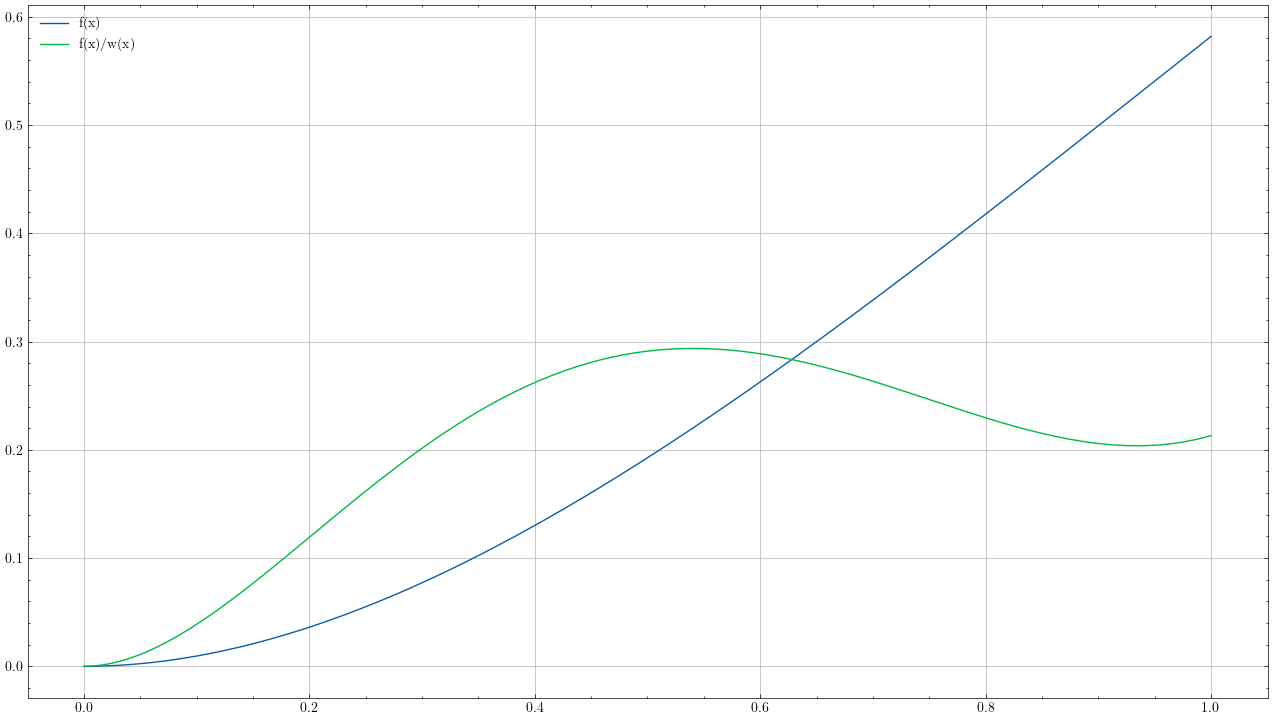

In [5]:
xs = np.linspace(0.0001, 1.0, 200)
plt.figure(figsize=(16,9))
ys = f(xs)
plt.plot(xs, ys, label='f(x)')

ys = g(xs,a,b,N)
plt.plot(xs, ys, label='f(x)/w(x)')
plt.grid()
plt.legend()

# Question 2

In [6]:
def w_d(x):
    y = 1/(1 + (x-1)**2)
    return y

# Metropolis implementation
def metro(x, N, st,f=f):
    xar = np.zeros(N)
    for i in range(N):
        xar[i] = x
        x1 = x + st*(2*np.random.rand()-1)
        r = min([1,w_d(x1)/w_d(x)])
        c = np.random.rand()
        if c<=r:
            x = x1
    return xar
                

In [12]:
N = int(1e6)
# corresponds to a step size of 1
st = 1
x0 = 0.5
val = metro(x0,N,st)

Text(0, 0.5, 'Prob. Dist.')

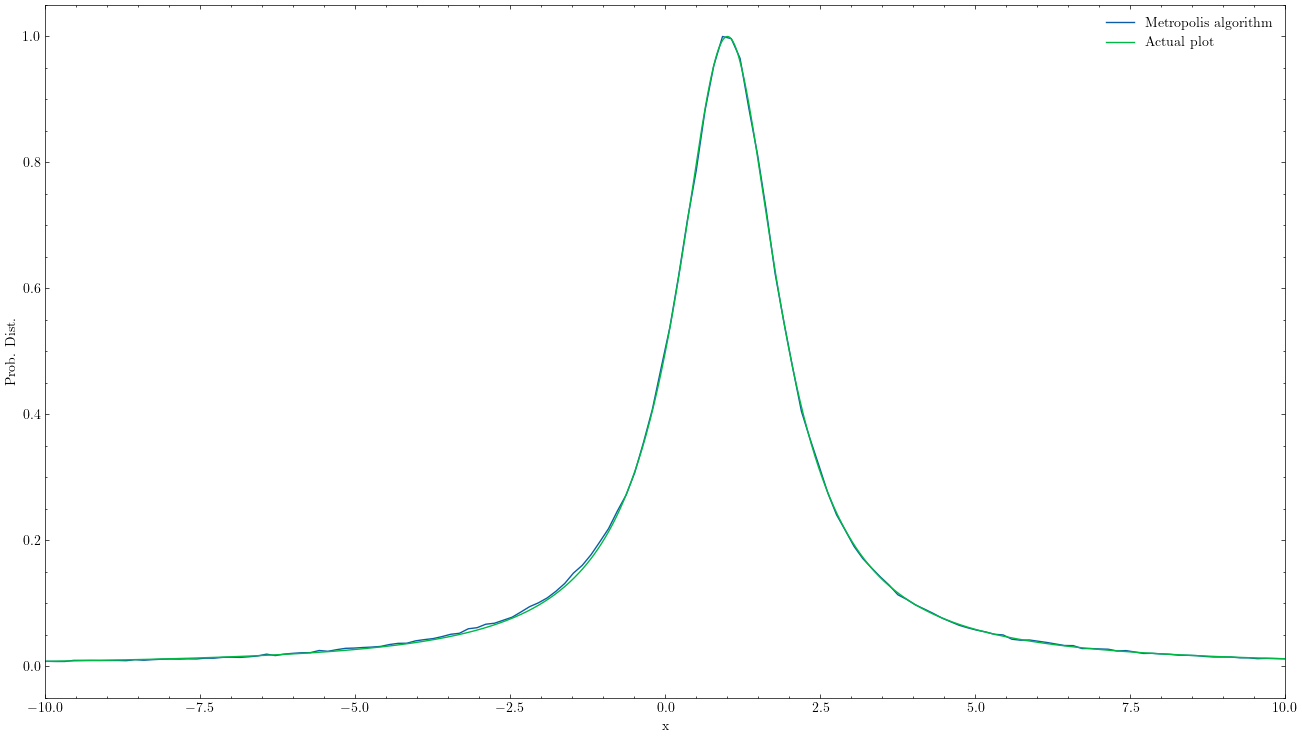

In [20]:
xv = np.linspace(-10,10,1000)
yv = w_d(xv)
plt.figure(figsize=(16,9))
dat = np.histogram(val,bins=1000)
h = dat[0]
bins = dat[1]
mdt =  [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
plt.plot(mdt,h/np.max(h), label = "Metropolis algorithm")
plt.xlim((-10,10))
plt.plot(xv, yv,label = "Actual plot")
plt.xlabel("x")
plt.legend()
plt.ylabel("Prob. Dist.")